# This is a program that will return daily historical share price data and generate a number of useful charts and plots.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [5]:
# Specify date range
start = datetime.datetime(2000,1,1)
end = datetime.date.today()

In [6]:
# Ask user for stock code
stock = input('Enter ASX Stock Code: ')
stock = str(stock) + '.AX'

Enter ASX Stock Code: BHP


In [7]:
# create empty pandas data frame
df = pd.DataFrame()

In [8]:
# Download historic data for selected stock
df = yf.download(stock, start=start, end=end, progress=False)
# df = df['Close']

In [9]:
# Claculate moving average and add this to data frame 
df['50 Day MA'] = df.iloc[:,4].rolling(window=50).mean()
df['21 Day MA'] = df.iloc[:,4].rolling(window=21).mean()

In [10]:
# df.tail()

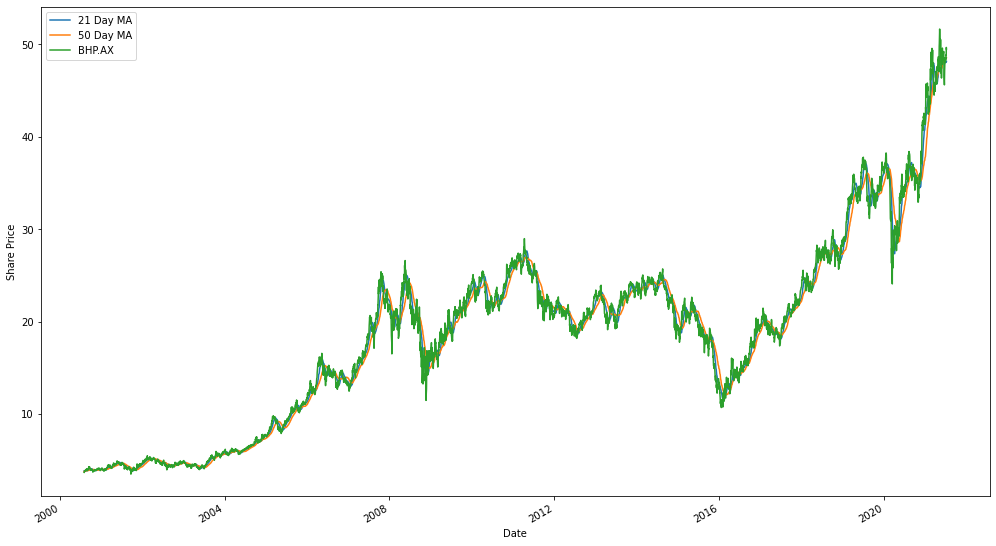

In [38]:
df['21 Day MA'].plot(label='21 Day MA', figsize=(17,10)).set_ylabel('Share Price')
df['50 Day MA'].plot(label='50 Day MA')
df['Adj Close'].plot(label=str(stock))
plt.legend()
plt.show()

In [12]:
# Calculate 1 day log return

df['Change'] = np.log(df['Close'] / df['Close'].shift(1))
# df.tail()

Text(0.5, 1.0, 'BHP 1 Day Log Return')

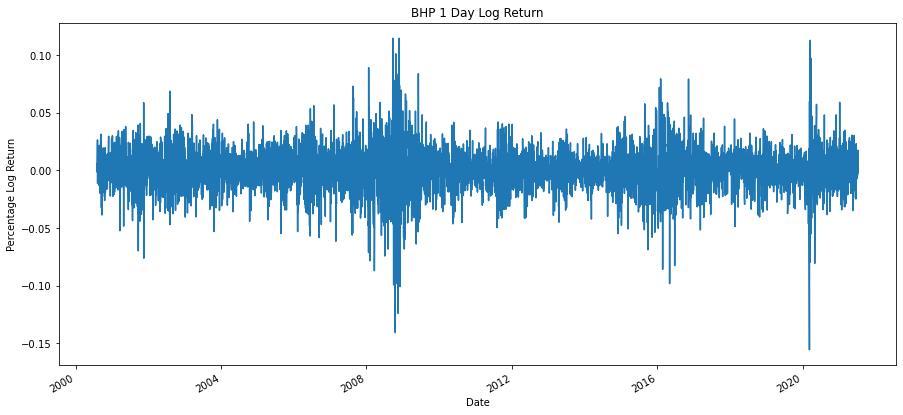

In [39]:
df['Change'].plot(figsize=(15,7)).set_ylabel('Percentage Log Return')
plt.title(str(stock[0:3]) + ' 1 Day Log Return')

In [14]:
# Calculate the rolling volatility, (21 days is standard).

df['21 Day Vol'] = df.Change.rolling(21).std()
# df.tail()

Text(0.5, 1.0, 'BHP 21 Day Volatility')

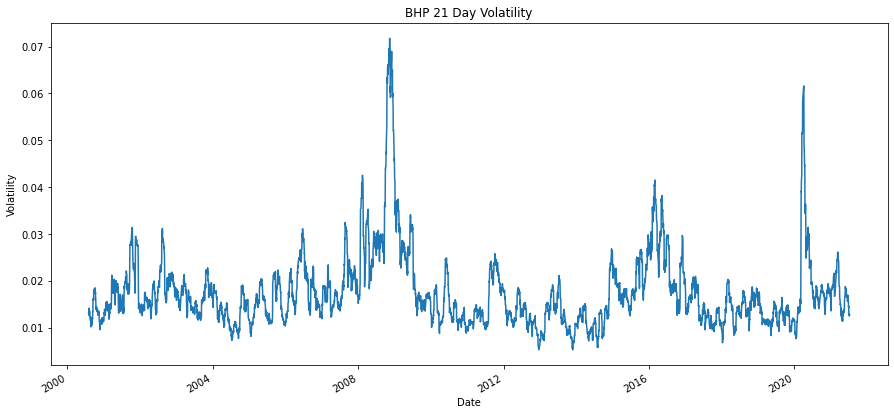

In [40]:
df['21 Day Vol'].plot(figsize=(15,7)).set_ylabel('Volatility')
plt.title(str(stock[0:3]) + ' 21 Day Volatility')

In [16]:
# 1. Calculate the Dollar Value change in the price
# 2. Calculate the expected 1 day change in the stock price using volatility as the explanatory variable

df['$ Change'] = df['Close'] - df['Close'].shift(1)
df['Expected Change'] = df['Close'] * df['21 Day Vol']
# df

In [28]:
# Slice data frame to not include blank data

df = df.iloc[49:]
# df

In [18]:
# Calculate the magnitude of the actual $ change over the expected change to visualise the difference between expected change and actual $ change

df['Magnitude'] = df['$ Change'] / df['Expected Change']
# df

<ipython-input-18-00c24158139c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magnitude'] = df['$ Change'] / df['Expected Change']


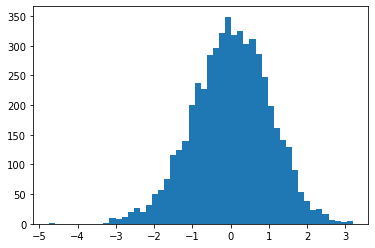

In [42]:
plt.hist(df['Magnitude'], bins=(50))
plt.show()

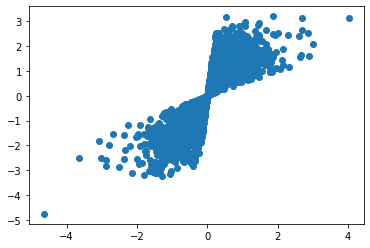

In [20]:
plt.scatter(df['$ Change'], df['Magnitude'])

In [21]:
df['Abs Mag'] = np.abs(df['Magnitude'])
# df

<ipython-input-21-ea6abac06222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abs Mag'] = np.abs(df['Magnitude'])


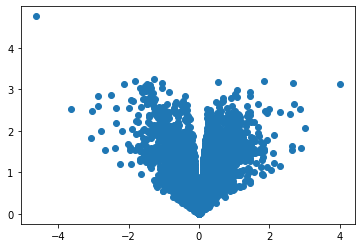

In [22]:
# Scatter plot of the actual change with the absolute value of the magnitude 

plt.scatter(df['$ Change'], df['Abs Mag'])